In [1]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



# Import the complete case data and Groups

In [2]:
# Import complete cases
df = cudf.read_parquet('/rapids/my_data/usa.bg.cc.parquet')
# Import groups
gp = cudf.read_parquet('/rapids/my_data/Clusters_K_7_BG_Logit.parquet') 

In [3]:
df

,GEOID,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,...,Tablet_or_other_portable_wireless_computer_with_no_other_type_of_computing_device,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription
0,020130001001,-3.955508,-6.000000,-6.000000,-5.763099,-4.455404,-6.000000,-3.057724,-2.303734,-2.705826,...,-3.423176,-2.197225,-6.000000,-3.263576,-3.001272,-2.386467,-3.610918,0.748939,-2.348726,-2.926739
1,020130001002,-3.458307,-3.514030,-3.283414,-4.406719,-4.720121,-6.000000,-3.485803,-3.173878,-3.736026,...,-3.964886,-1.584120,-6.000000,-3.708137,-2.519998,-2.559235,-3.252587,-0.522189,-1.785746,-2.477098
2,020130001003,-4.357563,-4.583265,-3.553615,-4.015954,-6.000000,-6.000000,-4.117753,-2.949777,-3.355153,...,-6.000000,-2.534720,-6.000000,-3.946424,-2.765060,-1.291259,-2.949439,-1.079744,-2.039596,-2.854082
3,020160001001,-3.263576,-3.652820,-3.324600,-3.048942,-3.946961,-4.649719,-5.465948,-3.001272,-2.770354,...,-4.590057,-2.436897,-6.000000,-1.986732,-2.746202,-2.308125,-3.311585,-1.318576,-1.203973,-2.877949
4,020160002001,-3.900909,-4.014261,-4.108226,-4.455932,-5.474893,-4.912130,-3.874401,-2.964944,-3.120895,...,-6.000000,-3.206803,-5.545177,-1.751486,-3.504556,-1.691018,-3.206803,-2.005018,-1.781771,-3.900625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,560459511001,-3.134890,-3.359537,-3.209880,-4.105591,-6.000000,-6.000000,-3.969702,-3.164269,-4.002041,...,-4.153661,-2.018559,-6.000000,-0.633800,-2.264897,-2.613117,-4.338597,-1.548813,-1.176574,-5.370056
236771,560459511002,-4.940343,-3.891162,-4.501116,-6.000000,-3.532359,-6.000000,-4.697228,-4.287193,-2.871452,...,-6.000000,-1.514128,-6.000000,-2.997455,-1.386294,-1.995539,-2.961831,-1.427794,-2.514836,-3.665963
236772,560459513001,-2.661693,-2.393339,-6.000000,-3.173704,-6.000000,-6.000000,-6.000000,-2.689457,-2.661693,...,-6.000000,-2.224072,-6.000000,-0.723179,-2.179642,-2.654095,-1.787119,-1.755058,-1.023043,-6.000000
236773,560459513002,-4.680706,-3.266200,-6.000000,-3.590076,-6.000000,-6.000000,-3.226991,-3.189153,-3.082945,...,-6.000000,-3.512540,-6.000000,-1.345764,-1.417966,-3.164068,-1.369487,-3.214868,-1.457516,-6.000000


In [4]:
gp

,GEOID,cluster
0,020130001001,5.0
1,020130001002,5.0
2,020130001003,5.0
3,020160001001,5.0
4,020160002001,2.0
...,...,...
239775,550759900000,99.0
239776,540219800001,99.0
239777,540290214001,99.0
239778,540679507001,99.0


In [5]:
# Set index
df = df.set_index('GEOID')
gp = gp.set_index('GEOID')

In [10]:
# Append clusters
df_merged = df.merge(gp, on=['GEOID'], how='left')

In [11]:
df_merged

,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,Male_35_to_39_years,...,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription,cluster
0,-6.000000,-3.742947,-1.587998,-2.678278,-3.216206,-6.000000,-6.000000,-6.000000,-4.341205,-6.000000,...,-6.000000,-6.000000,-1.695616,-6.000000,-6.000000,-6.000000,-6.000000,-0.295184,-6.000000,1.0
1,-2.614131,-3.046259,-3.529434,-5.234778,-3.343239,-4.104497,-5.299650,-3.950569,-4.826646,-3.313500,...,-1.371027,-6.000000,-1.422474,-3.921452,-2.782409,-2.963984,-1.371027,-1.322910,-3.800922,5.0
2,-2.892162,-3.517672,-2.506214,-4.225545,-6.000000,-5.276413,-4.060443,-4.225545,-4.578142,-3.832980,...,-1.499235,-6.000000,-2.274536,-2.595255,-4.418841,-6.000000,-1.299283,-1.010157,-6.000000,5.0
3,-4.388822,-2.988731,-3.203907,-3.511545,-4.845311,-4.845311,-4.591747,-6.000000,-6.000000,-2.851060,...,-1.612766,-6.000000,-1.497321,-2.642029,-2.140066,-3.070956,-1.653290,-1.154392,-3.472656,7.0
4,-4.443305,-2.424241,-2.992348,-5.036303,-3.630323,-4.697228,-2.950572,-4.562393,-3.320897,-3.283191,...,-2.245832,-6.000000,-1.202543,-1.609438,-3.430586,-6.000000,-1.826851,-0.834114,-5.036303,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,-3.869780,-4.074236,-2.795017,-4.573304,-4.193907,-6.000000,-4.721314,-4.132339,-4.102879,-4.404371,...,-2.538151,-6.000000,-3.656544,-3.372041,-1.959051,-3.408315,-2.267842,-1.166210,-4.525562,3.0
236771,-4.021057,-3.489993,-4.062596,-3.540234,-6.000000,-4.021057,-6.000000,-5.306852,-3.592977,-4.683555,...,-3.471235,-6.000000,-2.352347,-6.000000,-2.519998,-3.828641,-2.599837,-1.312186,-5.306852,7.0
236772,-2.064626,-3.686272,-2.833753,-3.798880,-6.000000,-4.310799,-6.000000,-3.047194,-3.565351,-4.801456,...,-1.714798,-5.082956,-2.992501,-3.349904,-3.501281,-2.749897,-1.644989,-0.976631,-4.132324,4.0
236773,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-3.254427,-6.000000,-3.636678,...,-3.245193,-6.000000,-2.404733,-1.931700,-1.903725,-6.000000,-2.214708,-6.000000,-6.000000,4.0


In [15]:
# Count of Block Gropups by Cluster
df_merged.cluster.value_counts()

4.0    50328
1.0    39859
3.0    39035
5.0    34488
7.0    31227
2.0    26690
6.0    15148
Name: cluster, dtype: int32

In [26]:
#Split DF and remove cluster
groups = df_merged.groupby(df_merged.cluster)
df_merged_1 = groups.get_group(1)
df_merged_2 = groups.get_group(2)
df_merged_3 = groups.get_group(3)
df_merged_4 = groups.get_group(4)
df_merged_5 = groups.get_group(5)
df_merged_6 = groups.get_group(6)
df_merged_7 = groups.get_group(7)

#remove cluster column
del df_merged_1['cluster']
del df_merged_2['cluster']
del df_merged_3['cluster']
del df_merged_4['cluster']
del df_merged_5['cluster']
del df_merged_6['cluster']
del df_merged_7['cluster']

#convert to pandas
df_merged_1= df_merged_1.to_pandas()
df_merged_2= df_merged_2.to_pandas()
df_merged_3= df_merged_3.to_pandas()
df_merged_4= df_merged_4.to_pandas()
df_merged_5= df_merged_5.to_pandas()
df_merged_6= df_merged_6.to_pandas()
df_merged_7= df_merged_7.to_pandas()

In [28]:
# cgram = Clustergram(range(1, 15), backend='cuml',n_init=1000)
df_merged_1_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_1_cgram.fit(df_merged_1)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 321.1819701194763 seconds.
K=3 fitted in 375.9560582637787 seconds.
K=4 fitted in 546.7772033214569 seconds.
K=5 fitted in 639.1393291950226 seconds.
K=6 fitted in 785.3385181427002 seconds.
K=7 fitted in 898.2452909946442 seconds.


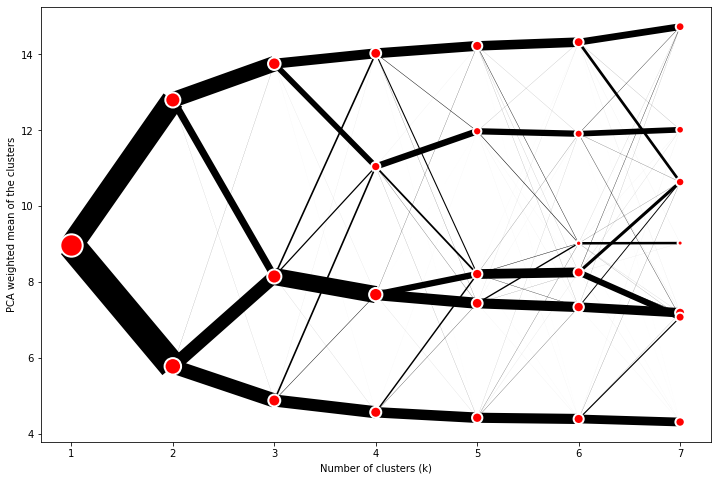

In [30]:
df_merged_1_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C1.pdf')

In [31]:
df_merged_2_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_2_cgram.fit(df_merged_2)

df_merged_3_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_3_cgram.fit(df_merged_3)

df_merged_4_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_4_cgram.fit(df_merged_4)

df_merged_5_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_5_cgram.fit(df_merged_5)

df_merged_6_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_6_cgram.fit(df_merged_6)

df_merged_7_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_7_cgram.fit(df_merged_7)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 344.3874433040619 seconds.
K=3 fitted in 472.48876309394836 seconds.
K=4 fitted in 492.87940073013306 seconds.
K=5 fitted in 538.8932974338531 seconds.
K=6 fitted in 1028.564979314804 seconds.
K=7 fitted in 1216.0395095348358 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 438.7108201980591 seconds.
K=3 fitted in 501.39679884910583 seconds.
K=4 fitted in 847.2960641384125 seconds.
K=5 fitted in 887.9286825656891 seconds.
K=6 fitted in 760.7353129386902 seconds.
K=7 fitted in 837.8678402900696 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 305.6173496246338 seconds.
K=3 fitted in 385.13371539115906 seconds.
K=4 fitted in 381.18179202079773 seconds.
K=5 fitted in 667.7853512763977 seconds.
K=6 fitted in 653.3294003009796 seconds.
K=7 fitted in 1056.9630744457245 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 337.90838384628296 seconds.
K=3 fitted in 721.1636726

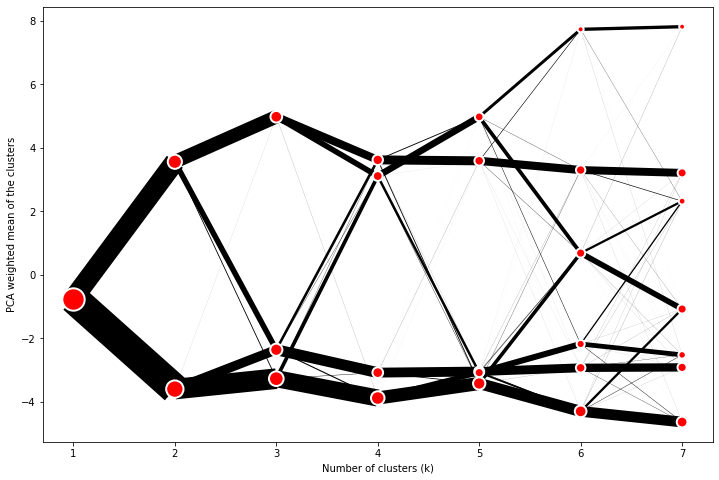

In [32]:
df_merged_2_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C2.pdf')

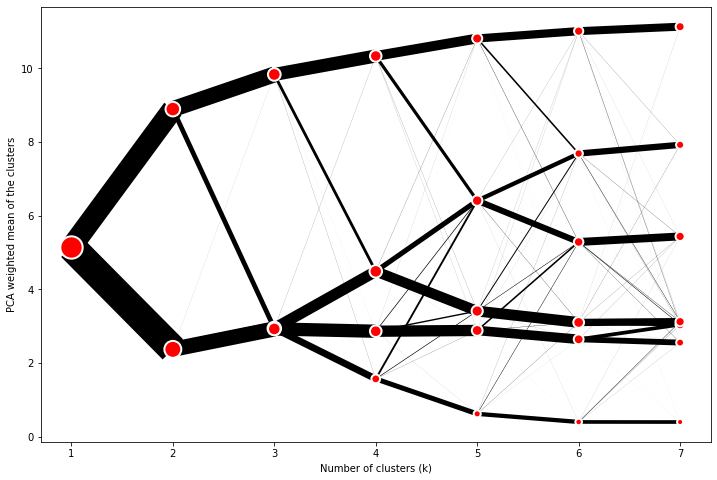

In [33]:
df_merged_3_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C3.pdf')

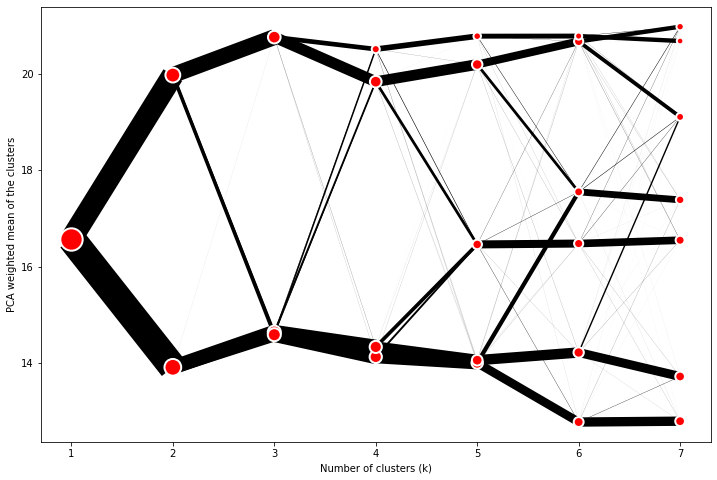

In [34]:
df_merged_4_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C4.pdf')

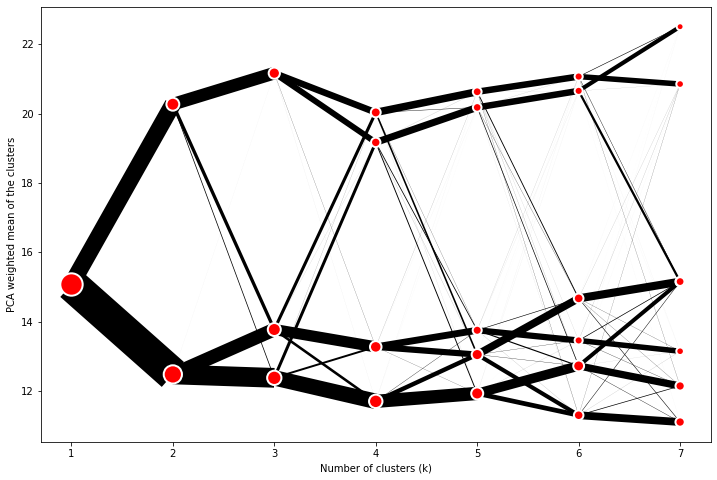

In [35]:
df_merged_5_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C5.pdf')

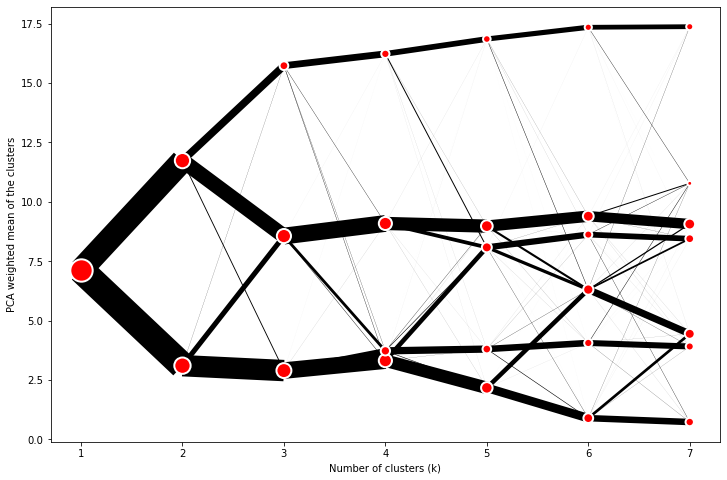

In [36]:
df_merged_6_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C6.pdf')

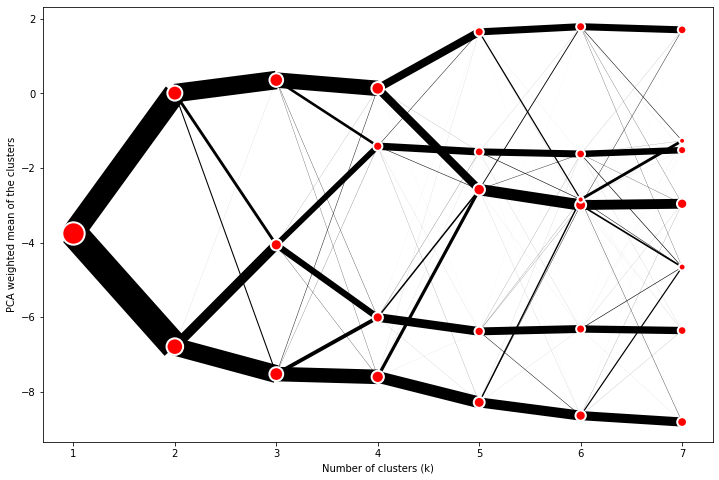

In [37]:
df_merged_7_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C7.pdf')